# Human Activity Recognition - The Journey (1/2)

In this notebook, I will explain some of the hardships, lessons learned, and decisions throughout the capstone project. The technical component of the project can be found in the other notebook, `Capstone Project`. 

### Research Question

**The Inspiration**

Since the beginning of the bootcamp, I did my best to explore the world of Data Science. One area that particularly caught my attention was computer vision. Computer vision is the field of computer science that focuses on replicating parts of the complexity of the human vision system and enabling computers to identify and process objects in images and videos in the same way that humans do. The more I learned about computer vision, the more I become fascinated about its applications. I knew I wanted to do an entry level computer vision project for my capstone. 

**The Question** 

<center>Can we use convolutional neural networks to classify human activity through videos?<center/>
    
  
**Dataset**

UFC 101 - Action Recognition Data Set contains 13320 videos from 101 action categories. It developed by the University of Central Florida in their Center for Research in Computer Vision
    

|         |          |        |           | Classes |   |          |            |             |             | 
|---------|----------|--------|-----------|-------------------|----------|----------|------------|-------------|-------------| 
| Apply Eye Makeup |Apply Lipstick| Archery| Baby Crawling| Balance Beam| Band Marching| Baseball Pitch| Basketball Shooting| Basketball Dunk| Bench Press| 
| Biking |Billiards Shot | Blow Dry Hair | Blowing Candles | Body Weight Squats | Bowling | Boxing Punching Bag | Boxing Speed Bag |  Breaststroke | Brushing Teeth | 
|Clean and Jerk | Cliff Diving | Cricket Bowling | Cricket Shot | Cutting In Kitchen | Diving | Drumming | Fencing | Field Hockey Penalty | Floor Gymnastics |
| Frisbee Catch | Front Crawl | Golf Swing | Haircut | Hammer Throw | Hammering | Handstand Pushups | Handstand Walking | Head Massage | High Jump | 
|Horse Race | Horse Riding |Hula Hoop |Ice Dancing | Javelin Throw | Juggling Balls | Jump Rope | Jumping Jack | Kayaking | Knitting |
|Long Jump | Lunges | Military Parade | Mixing Batter |Mopping Floor | Nun chucks | Parallel Bars | Pizza Tossing | Playing Guitar | Playing Piano |
|Playing Tabla | Playing Violin | Playing Cello | Playing Daf | Playing Dhol | Playing Flute | Playing Sitar | Pole Vault | Pommel Horse | Pull Ups | 
| Punch | Push Ups | Rafting |Rock Climbing Indoor | Rope Climbing | Rowing | Salsa Spins | Shaving Beard | Shotput | Skate Boarding |
|Skiing | Skijet | Sky Diving | Soccer Juggling | Soccer Penalty | Still Rings | Sumo Wrestling | Surfing | Swing | Table Tennis Shot | 
|Tai Chi | Tennis Swing | Throw Discus |Trampoline Jumping | Typing | Uneven Bars | Volleyball Spiking | Walking with a dog |Wall Pushups | Writing On Board |
| Yo Yo |    

### First Hurdle - Computation Power

After discussing with my educator, we decided to approach this dataset using 3D convolutional neural networks. I later realized that my decision was rather ambitious as an amateur data scientist. The first hurdle arised during preprocessing the data. A Tensorflow neural network model expects image data to be passed in as a 4D tensor. In other words, I needed to convert my videos into multidimensional arrays. My personal computer did not have enough RAM to perform the computations.  

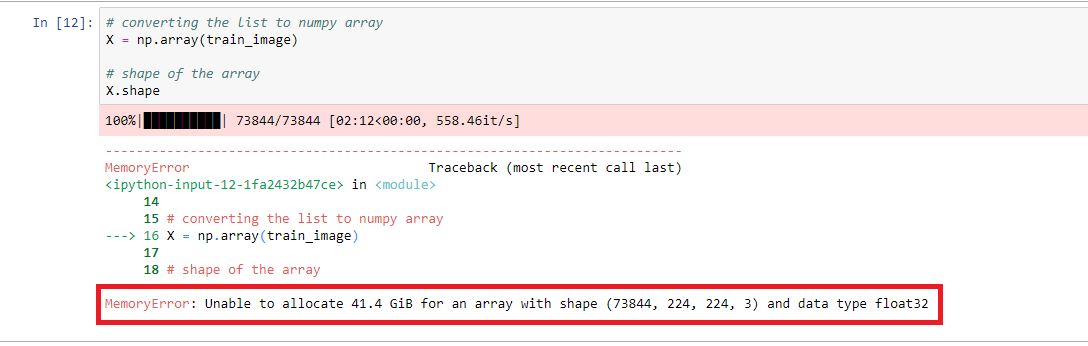

### Second Hurdle - Data to S3

To combat the RAM issue, I decided to tried Amazon Web Services (AWS) SageMaker. SageMaker can only access data via AWS Simple Storage Service (S3) buckets. The second hurdle was uploading my dataset to my personal S3 bucket. Originally, I tried uploading my dataset via the online AWS console. The upload calculator estimated that it will take about 3 days for me to upload 2GBs. In addition, I had another 4GBs I wanted to upload. I think the online AWS console can upload fast if the 2GBs is in a single file, but my 2GB was in a folder format with ~10000 images.   

<br>
<center><b> Current Upload Flow: Local -> Filezilla -> HDFS -> S3 </b></center>
</br>

I sought for advice and an educator suggested me to log into an AWS Elastic Computing (EC2) instance and downloading the files from my personal computer to the Hadoop Distributed File System (HDFS). Once the data was on HDFS, I would need to move the files from HDFS to S3. My first approach was to use my learnings from the Hadoop Lecture and utilize Filezilla. I quickly found errors using an EC2 instance to connect with Filezilla. After some attempt to find solutions, I decided to test with an AWS Elastic MapReduce (EMR) instance. I knew this should work because the example given in the Hadoop Lecture was using an EMR instance to connect to Filezilla. As expected, the EMR was successfully connected with Filezilla. My next step was the move my selected folder from my personal computer to HDFS via Filezilla. I moved my 2GB folder to the HDFS side on Filezilla. The upload calculator estimated that it will take about 20 hours to upload. The upload speed was highly inefficient and potentially costly. I decided to reread the Hadoop Lecture for any tips and tricks that I might have missed or forgotten. In the Filezilla transfer example, the folder that was moved to HDFS was originally GUNZIPPED and then extracted in HDFS. This gave me the idea that I need to GUNZIP my folder first and then move it on to HDFS. Subsequently, I will need to extract the GUNZIP folder on the Head Node. I also confirmed that I cannot unzip a file in HDFS and only un-GUNZIP. My hypothesis was that GUNZIPPING my folder then transferring would greatly reduced the original estimated 20 hours upload time. I soon discovered that I could not GUNZIP my folder. Since my folder is filled with images, I needed to TAR, another ZIP compression program, my folder. I had great difficulty learning how to TAR my folder and was unable to do so in the end. Thankfully, I learned that I could use AWS Command Line Interface (AWS CLI) to upload files from my local machine to S3. 

<br>
<center><b> Optimal Upload Flow: Local (AWS CLI) -> S3 </b></center>
</br>

AWS CLI is integrated with my local machine commmand terminal; thus, I did not need to spin-up an instance. I was able upload all the files I needed via AWS CLI to my personal S3 in about 20 minutes. The next phase was read in the files using SageMaker. Initally, I was using AWS Boto3 to communicate with S3 in the SageMaker Notebook. I was having troubles reading in text files via Boto3. An educator taught me that I could move S3 files to a local SageMaker home folder and the path syntax would be identical to local machine path syntax. Finally, the second hurdle came to a close. 

### First Hurdle - Revisisted 

The inadequate amount of RAM on my local machine lead me to explore SageMaker. I decided to spin-up a SageMaker notebook with an ml.m5.4xlarge instance, which boast a 16 vCPU and 64 GBs of RAM. The original error needed 41.4 GBs of RAM, so I thought 64 GBs with this instance should be sufficient. Unfortunately, I recieved the same error and paying for a better instances isn't ideal. At this point, I decided approach this problem in a different direction. I will break the videos into frames and load them in batches so I can reduce computational load.     

### Third Hurdle - 3D CNN Complexity  

Once I loaded my data into batches and was able to convert my data into 4D tensors, my next hurdle came with working with 3D convolutional neural networks. Working with 3D convolutional neural networks proved to be incredibly difficult. Even working with an educator, we could not figure it out. There was only a few more weeks before the end of the Bootcamp, so I made the decision to work with 2D convolutional neural networks instead. 

### Fourth Hurdle -  EPOCH SPEED 

We got everything working with 2D convolutional neural networks. The fourth hurdle was the epoch training speed. It was taking about 1 hour per epoch to train on my personal computer. I tried SageMaker and it took about 50 minutes per epoch. An educator suggested me to try Google Colaboratory (Colab). 

I have never worked with Google Colab and it was a bit challenging to setup. Google Colab can only access data available in my personal Google Drive. Uploading 2GB of Image Data was estimated to take 20 hours. After some researching, zipping the image folder then uploading to Google Drive is much faster. This process took about 20 minutes. Once the ZIP folder was finished uploading, I will unzip via Google Colab Notebook. This [method](https://towardsdatascience.com/how-to-successfully-add-large-data-sets-to-google-drive-130beb320f1a) was proven to reduce probability for data loss and the unzipped data will appear in the Google Colab File Dashboard. Unfortunately, Google Colab was going to take 10 hours per epoch.     


Luckily, an educator advised to reduce the frame dimensions. The original frame dimensions are 240x320x3. I will reduce the frame dimensions by a magnitude of 100 to 24x32. I will also set the colour channel to 1. I want to prevent the neural network picking up colour as a feature. Therefore, the new frame dimensions are 24x32x1. This greatly improved the epoch speed to around 17 seconds per epoch. 

Please continue with the next notebook, `Capstone Project`. 